In [97]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal 
from scipy.signal import lfilter
from scipy.signal import butter
import peakutils.peak
%matplotlib inline
import pandas as pd
from __future__ import  division

In [4]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

In [5]:
def notch_filter(data,f0,Q, fs):
    #fs = 256.0  # Sample frequency (Hz)
    #f0 = 50.0  # Frequency to be removed from signal (Hz)
   # Q = 30.0  # Quality factor
    w0 = f0/(fs/2)  # Normalized Frequency
    b, a = signal.iirnotch(w0, Q)
    y = lfilter(b, a, data)
    return y


In [6]:
def diff(data):
    dataout=np.empty((6000))
    dataout[0]= (256/8)*(2*data[1]+data[2])
    #print data[0]
    dataout[1] = (256/8)*(2*data[2]+data[3])
    for i in range (2,4000):
        dataout[i]=(1/8)*(-data[i-2]-2*data[i-1]+2*data[i+1]+data[i+2])
        #print data[i]
    return dataout   

In [7]:
def mawindow(data,n):
    dataout = np.cumsum(data, dtype=float)
    dataout[n:] = dataout[n:] - dataout[:-n]
    return dataout[n - 1:] / n  

In [8]:
def filter_noise(data,f0,Q, fs,lowcut, highcut,order=5):
    y = notch_filter(data,f0,Q, fs)
    yy = butter_bandpass_filter(y, lowcut, highcut, fs, order=5)
    return yy

In [37]:
def findR(data,threshold,N):
    arr = (data*1000)-threshold
    result = [max(arr[i:i+N]) for i in range(0, len(arr), N)]
    
    for j in range (0,len(result)):
        if(result[j]<0):
            result[j]=0
      
    A=[]
    P =[]
    for j in range (0,len(result)):
            if(result[j]!=0):
                B = np.where(arr==result[j])[0]
                A = np.append(A,B)
                P = np.append(P,result[j])
    A=(A+10)/256
    P = P+threshold
    return  A,P   
    
    

In [10]:
def process_after_filter(data,n):
    y= diff(data)
    y = y*y
    yy = mawindow(y,n)
    return yy

In [294]:
data= np.loadtxt('DataN.txt',skiprows=0,unpack=True)
x= np.empty((0))
print 2/256   
for i in range(0,65773):
    x = np.append(x, (i/256))

0.0078125


In [16]:
y = filter_noise(data,50,30, 256,0.1, 45,order=5)

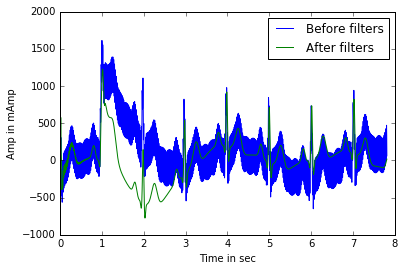

In [17]:
#plt.figure(figsize=(15,15))
plt.xlabel("Time in sec")
plt.ylabel("Amp in mAmp")
line_up,=plt.plot(x[0:2000],data[0:2000]*1000,label='Before filters')
line_down,=plt.plot(x[0:2000],y[0:2000]*1000,label='After filters')
plt.legend([line_up, line_down], ['Before filters', 'After filters'])
#plt.xlim(0, 8.0)
#plt.ylim(-0.1,0.1)


In [143]:
 
A=[]
P=[]
ynoise = process_after_filter(data,25)
yy = process_after_filter(y,25)
threshold = np.max(ynoise[10:1980],axis=0)*1000*0.8
print threshold
A,P=findR(ynoise[10:1980],threshold,25)


15.5839298393


(0, 50)

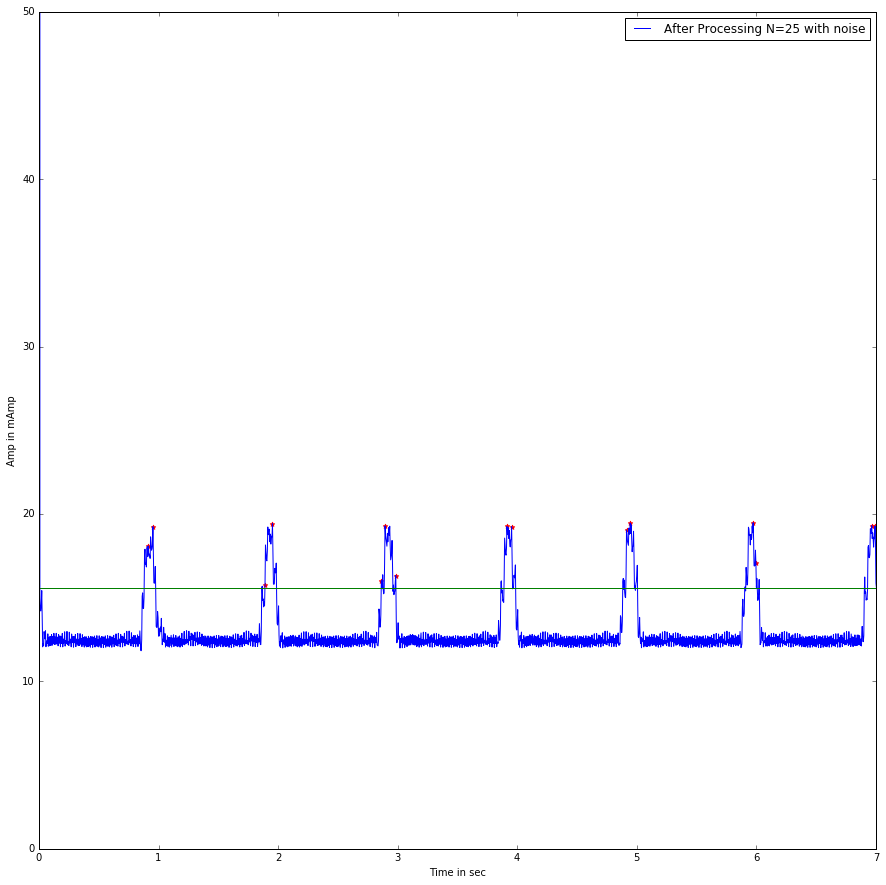

In [145]:
plt.figure(figsize=(15,15))
plt.xlabel("Time in sec")
plt.ylabel("Amp in mAmp")
line_down,=plt.plot(x[0:2000],(ynoise[0:2000]*1000),label='After filters')
plt.axhline(y=threshold, color='G', linestyle='-')
plt.scatter(A,P, marker='*', color="red")
plt.legend([line_down], ['After Processing N=25 with noise'])
plt.xlim(0, 7.0)
plt.ylim(0,50)


In [77]:
data1= np.loadtxt('Data2.txt',skiprows=0,unpack=True)
print len(data1)
x= np.empty((0))  
for i in range(0,65586):
    x = np.append(x, (i/256))

65586


In [12]:
y1 = filter_noise(data1,50,30, 256,0.1, 45,order=5)
yy1 = process_after_filter(y1,25)

(-10, 50)

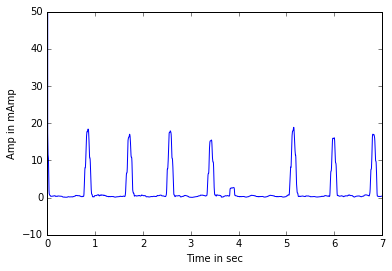

In [13]:
plt.xlabel("Time in sec")
plt.ylabel("Amp in mAmp")
line_down,=plt.plot(x[0:2000],yy1[0:2000]*1000,label='After filters')
plt.xlim(0, 7.0)
plt.ylim(-10,50)

In [78]:
#cb = np.array([-0.010223, ... ])
threshold1 = np.max(yy1[10:2000],axis=0)*0.8*1000

A1=[]
P1=[]
v =[]
N = 25
threshold1 = np.max(yy1[10:2000],axis=0)*0.8*1000
indexes = peakutils.peak.indexes(yy1[10:2000],
    threshold1)
A1,P1=findR(yy1[10:2000],threshold1,N)

beat =[]
missing=[]
G =[]     
for i in range (0,len(A1)-1):
         if ((A1[i+1]-A1[i])!=0):
            beat=np.append(beat,A1[i+1]-A1[i])          
beat = np.around(beat,1)
G = np.where(beat==0)[0]
beat = np.delete(beat, np.where(beat==0)[0])
P1 = np.delete(P1, G)
A1 = np.delete(A1, G)

8 8
65586


(0, 50)

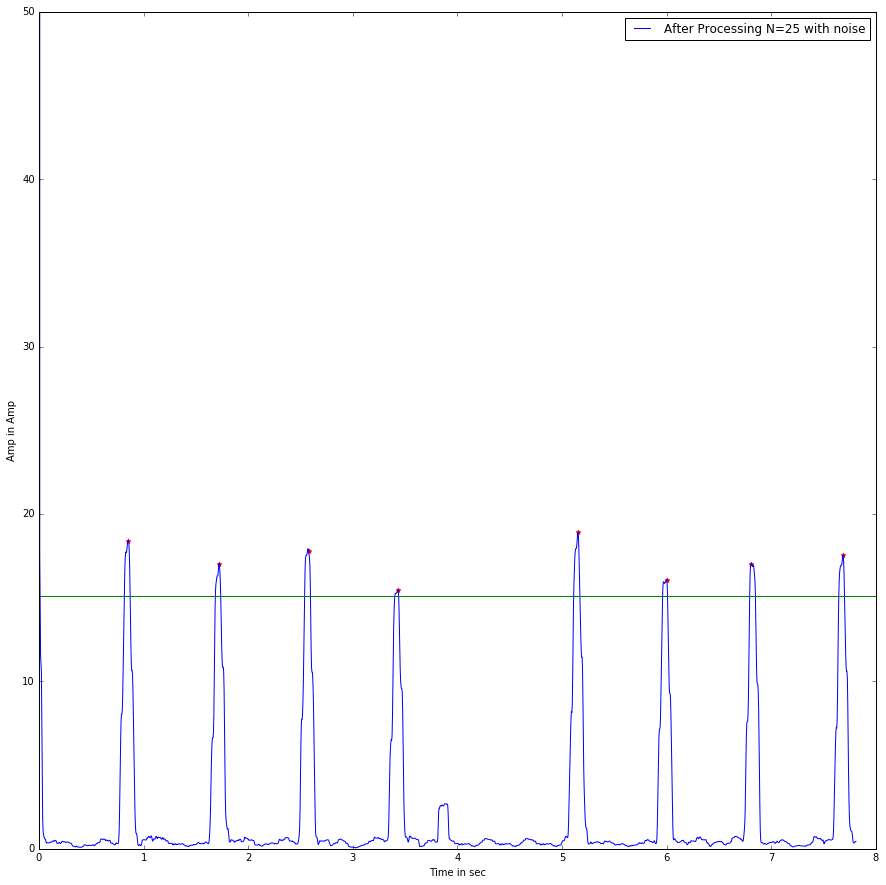

In [79]:
plt.figure(figsize=(15,15))
plt.xlabel("Time in sec")
plt.ylabel("Amp in Amp")
line_down,=plt.plot(x[0:2000],(yy1[0:2000]*1000),label='After filters')
plt.axhline(y=threshold1, color='G', linestyle='-')
plt.scatter(A1,P1, marker='*', color="red")
plt.legend([line_down], ['After Processing N=25 with noise'])
plt.xlim(0, 8.0)
plt.ylim(0,50)


In [112]:
print beat
RR = min(beat)
print RR
missing=[]
for i in range(0,len(beat)):
    if(beat[i] > 2*RR):
        times = beat[i]/RR
        print(round(times,0))
        timestamp = A1[i-1]
        for i in range (0,(int)(times-1)):
                timestamp +=RR
                missing = np.append(missing,timestamp)

text_file = open('MissingBeats.txt','w') 

text_file.write('Missing beats in the first 2000 samples\n') 
for i in range (0,len(missing)):
    text_file.write("Missing beat at: %s sec\n" % missing[i])
text_file.close()             


[ 0.8  0.8  0.9  1.7  0.8  0.8  0.8]
0.8
2.0
